In [1]:
import time
import os


import numpy as np
import pandas as pd

import datetime as dt


from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc,roc_auc_score

e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
models = {
            'linear' : {
                    'mod' : LogisticRegression(solver = 'saga'),
                    'par' : {'penalty' : ('l1','l2','elasticnet','none'),
                                'C': [1,1.5,2],
                            'l1_ratio':[0.2,0.5,0.8]}
                    },                     
            'gradient' : {
                    'mod' : GradientBoostingClassifier(warm_start = True),
                    'par' : {'loss' : ('deviance', 'exponential'),
                             'max_depth' : [3, 4, 5, 6, 7]}
                        },
           'tree':{'mod': DecisionTreeClassifier(),
                     'par':{'splitter':('best','random'),
                            'max_depth': [None, 2,4,6],
                            'min_samples_leaf':[1,5,8]}},
            'svm' : {
                    'mod' : svm.SVC(probability=True),
                    'par' : {'kernel' : ( 'linear', 'rbf')}
                    },
        'RandomForest' : {
                    'mod' : RandomForestClassifier(),
                    'par' : {'max_depth' :[None, 2,4,6],
                            'min_samples_leaf':[1,5,8]}
                        }
        }

In [3]:
def grid(x_name,n_proc, os_X_tt, os_Y_tt, models, score = 'roc_auc', cv = 50):
    # Gridsearch
    bestmodels = models.copy()
    for name in models:
        print('*'*80)
        print("Model: " + name)
        t_beg = time.time()

        pipeline = Pipeline([('scaler', StandardScaler()), (name,  bestmodels[name]['mod'])])          
        parameters = {}          
        for par in bestmodels[name]['par']:
            aux = name + '__' +  par
            parameters[aux] = bestmodels[name]['par'][par]    
        aux = GridSearchCV(pipeline, parameters, n_jobs = n_proc,\
                          scoring = score, verbose=2, cv = cv)
        aux.fit(os_X_tt, os_Y_tt)
        bestmodels[name]['bestModel'] = aux.best_estimator_
        bestmodels[name][score] = aux.best_score_
        bestmodels[name]['cols_order'] = os_X_tt.columns.values
        selection_time = time.time() - t_beg

        bestmodels[name]['selection_time'] = selection_time

        sample_f_path = f'{x_name}' + f'{name}_{dt.date.today().strftime("%Y%m%d-%H%M")}.sav'

        print(f"Saving model at {sample_f_path}")    
        joblib.dump(bestmodels[name]['bestModel'], sample_f_path)

        print(f"El tiempo de seleccion fue: {selection_time:0.3f} s")
        print(f"El error {score} de la familia {name} es: {bestmodels[name][score]:0.3f}")
        print('*'*80)
       
    mod_name = None
    best_mae = -np.inf
    for name in models:
        if bestmodels[name][score] > best_mae:
            mod_name = name
            best_mae = bestmodels[name][score]

    print(f"best model: " + mod_name + f" with an error {score} of: " + str(best_mae))
    
    return bestmodels

# 1. Lectura de los datos

In [4]:
path = 'databinarystudents.csv'
data = pd.read_csv(path, sep = ',', na_filter = False)
data = data.set_index('id')

In [5]:
# variables seleccionadas según diferentes criterios
y = data[['yL']].copy()
X = data.drop(columns = ['yL']).copy()

In [6]:
# Definición del tamaño del test
test_size = 0.3

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [8]:
X1_train= X_train[['x1','x2','x3','x4','x10','x11','x12','x17','x21','x22','x23','x24','x25','x27','x30','x31']].copy()
X1_test = X_test[['x1','x2','x3','x4','x10','x11','x12','x17','x21','x22','x23','x24','x25','x27','x30','x31']].copy()

X2_train= X_train[['x1','x2','x3','x4','x10','x11','x12','x17','x21','x23','x25','x27']].copy()
X2_test= X_test[['x1','x2','x3','x4','x10','x11','x12','x17','x21','x23','x25','x27']].copy()


X3_train= X_train[['x1','x2','x4','x10','x11','x12','x17','x21','x23','x25','x27']].copy()
X3_test= X_test[['x1','x2','x4','x10','x11','x12','x17','x21','x23','x25','x27']].copy()

X4_train= X_train[['x1','x2','x4','x10','x11','x12','x17','x23']].copy()
X4_test= X_test[['x1','x2','x4','x10','x11','x12','x17','x23']].copy()

In [9]:
Bestmodels_X1  = grid('X1', 3, X1_train, y_train.values, models, score = 'roc_auc', cv = 30)

********************************************************************************
Model: linear
Fitting 30 folds for each of 36 candidates, totalling 1080 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  56 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done 1080 out of 1080 | elapsed:   10.3s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversi

Saving model at X1linear_20190908-0000.sav
El tiempo de seleccion fue: 10.387 s
El error roc_auc de la familia linear es: 0.727
********************************************************************************
********************************************************************************
Model: gradient
Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Done  47 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done 289 tasks      | elapsed:   15.5s
[Parallel(n_jobs=3)]: Done 295 out of 300 | elapsed:   16.0s remaining:    0.2s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:   16.1s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Saving model at X1gradient_20190908-0000.sav
El tiempo de seleccion fue: 16.302 s
El error roc_auc de la familia gradient es: 0.606
********************************************************************************
********************************************************************************
Model: tree
Fitting 30 folds for each of 24 candidates, totalling 720 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 720 out of 720 | elapsed:    3.3s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X1tree_20190908-0000.sav
El tiempo de seleccion fue: 3.411 s
El error roc_auc de la familia tree es: 0.744
********************************************************************************
********************************************************************************
Model: svm
Fitting 30 folds for each of 2 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    0.6s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X1svm_20190908-0000.sav
El tiempo de seleccion fue: 0.666 s
El error roc_auc de la familia svm es: 0.730
********************************************************************************
********************************************************************************
Model: RandomForest
Fitting 30 folds for each of 12 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Done 180 tasks      | elapsed:    2.5s


Saving model at X1RandomForest_20190908-0000.sav
El tiempo de seleccion fue: 5.237 s
El error roc_auc de la familia RandomForest es: 0.743
********************************************************************************
best model: tree with an error roc_auc of: 0.7444444444444444


[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:    5.1s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

<IPython.core.display.Javascript object>


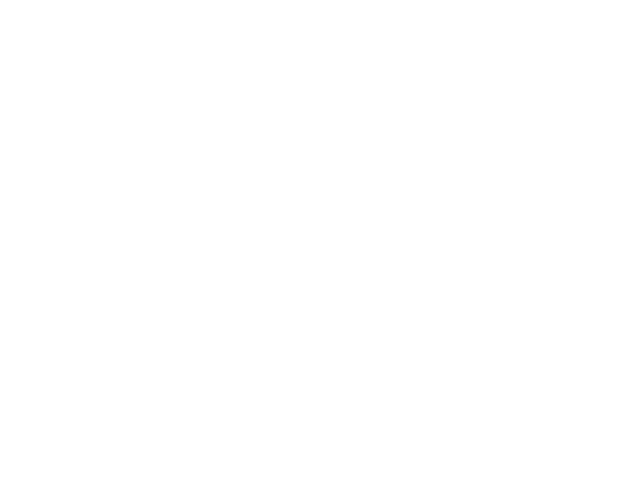

In [10]:
%matplotlib notebook
fig, ax = plt.subplots()
for m in Bestmodels_X1:
    model =Bestmodels_X1[m]['bestModel'] # select the model
#     y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X1_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X1_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic X1')
plt.legend(loc="lower right")
plt.show()   # Display
plt.savefig('Bestmodels_X1.png', facecolor=fig.get_facecolor(), bbox_inches='tight')

In [11]:
Bestmodels_X2  = grid('X2',3, X2_train, y_train.values, models, score = 'roc_auc', cv = 30)

********************************************************************************
Model: linear
Fitting 30 folds for each of 36 candidates, totalling 1080 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 354 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done 1080 out of 1080 | elapsed:    6.5s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversi

Saving model at X2linear_20190908-0000.sav
El tiempo de seleccion fue: 6.600 s
El error roc_auc de la familia linear es: 0.765
********************************************************************************
********************************************************************************
Model: gradient
Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Done  64 tasks      | elapsed:    3.3s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:   17.6s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X2gradient_20190908-0000.sav
El tiempo de seleccion fue: 17.764 s
El error roc_auc de la familia gradient es: 0.684
********************************************************************************
********************************************************************************
Model: tree
Fitting 30 folds for each of 24 candidates, totalling 720 fits


[Parallel(n_jobs=3)]: Done 720 out of 720 | elapsed:    2.5s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X2tree_20190908-0000.sav
El tiempo de seleccion fue: 2.615 s
El error roc_auc de la familia tree es: 0.749
********************************************************************************
********************************************************************************
Model: svm
Fitting 30 folds for each of 2 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    0.3s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X2svm_20190908-0000.sav
El tiempo de seleccion fue: 0.386 s
El error roc_auc de la familia svm es: 0.760
********************************************************************************
********************************************************************************
Model: RandomForest
Fitting 30 folds for each of 12 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Done 180 tasks      | elapsed:    2.1s


Saving model at X2RandomForest_20190908-0000.sav
El tiempo de seleccion fue: 4.271 s
El error roc_auc de la familia RandomForest es: 0.681
********************************************************************************
best model: linear with an error roc_auc of: 0.765079365079365


[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:    4.1s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

<IPython.core.display.Javascript object>


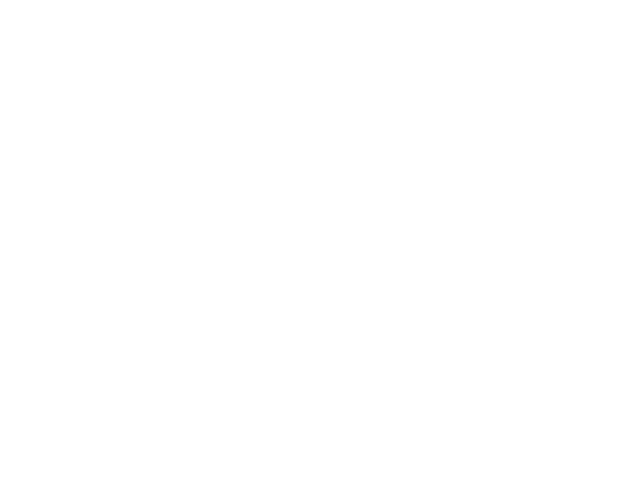

In [12]:
%matplotlib notebook
fig, ax = plt.subplots()
for m in Bestmodels_X2:
    model =Bestmodels_X2[m]['bestModel'] # select the model
#     y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X2_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X2_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic X2')
plt.legend(loc="lower right")
plt.show()   # Display
plt.savefig('Bestmodels_X2.png', facecolor=fig.get_facecolor(), bbox_inches='tight')

In [13]:
Bestmodels_X3  = grid('X3',3, X3_train, y_train.values, models, score = 'roc_auc', cv = 30)

********************************************************************************
Model: linear
Fitting 30 folds for each of 36 candidates, totalling 1080 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 528 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done 1080 out of 1080 | elapsed:    5.4s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversi

Saving model at X3linear_20190908-0000.sav
El tiempo de seleccion fue: 5.550 s
El error roc_auc de la familia linear es: 0.663
********************************************************************************
********************************************************************************
Model: gradient
Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:    6.1s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:   15.0s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X3gradient_20190908-0000.sav
El tiempo de seleccion fue: 15.187 s
El error roc_auc de la familia gradient es: 0.649
********************************************************************************
********************************************************************************
Model: tree
Fitting 30 folds for each of 24 candidates, totalling 720 fits


[Parallel(n_jobs=3)]: Done 586 tasks      | elapsed:    2.2s
[Parallel(n_jobs=3)]: Done 720 out of 720 | elapsed:    2.5s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X3tree_20190908-0000.sav
El tiempo de seleccion fue: 2.649 s
El error roc_auc de la familia tree es: 0.739
********************************************************************************
********************************************************************************
Model: svm
Fitting 30 folds for each of 2 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    0.3s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X3svm_20190908-0000.sav
El tiempo de seleccion fue: 0.459 s
El error roc_auc de la familia svm es: 0.702
********************************************************************************
********************************************************************************
Model: RandomForest
Fitting 30 folds for each of 12 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Done 238 tasks      | elapsed:    2.9s


Saving model at X3RandomForest_20190908-0000.sav
El tiempo de seleccion fue: 4.469 s
El error roc_auc de la familia RandomForest es: 0.732
********************************************************************************
best model: tree with an error roc_auc of: 0.7388888888888888


[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:    4.3s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

<IPython.core.display.Javascript object>


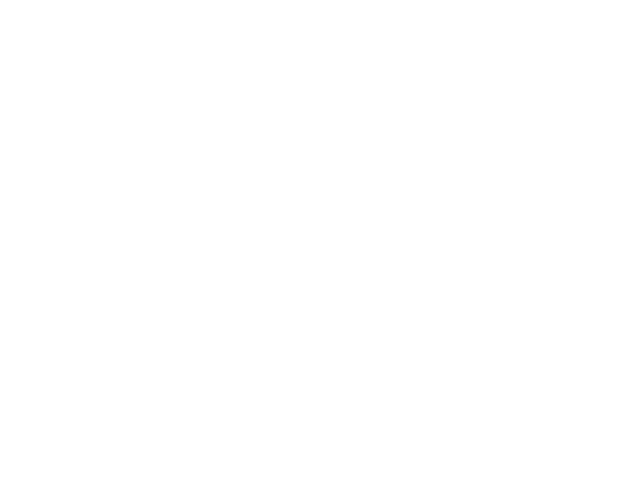

In [14]:
%matplotlib notebook
fig, ax = plt.subplots()
for m in Bestmodels_X3:
    model =Bestmodels_X3[m]['bestModel'] # select the model
#     y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X3_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X3_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic X3')
plt.legend(loc="lower right")
plt.show()   # Display
plt.savefig('Bestmodels_X3.png', facecolor=fig.get_facecolor(), bbox_inches='tight')

In [15]:
Bestmodels_X4  = grid('X4',3, X4_train, y_train.values, models, score = 'roc_auc', cv = 30)

********************************************************************************
Model: linear
Fitting 30 folds for each of 36 candidates, totalling 1080 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 528 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done 1080 out of 1080 | elapsed:    4.7s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversi

Saving model at X4linear_20190908-0000.sav
El tiempo de seleccion fue: 4.854 s
El error roc_auc de la familia linear es: 0.694
********************************************************************************
********************************************************************************
Model: gradient
Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Done  64 tasks      | elapsed:    2.3s
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:   14.9s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X4gradient_20190908-0000.sav
El tiempo de seleccion fue: 15.032 s
El error roc_auc de la familia gradient es: 0.705
********************************************************************************
********************************************************************************
Model: tree
Fitting 30 folds for each of 24 candidates, totalling 720 fits


[Parallel(n_jobs=3)]: Done 720 out of 720 | elapsed:    2.5s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X4tree_20190908-0000.sav
El tiempo de seleccion fue: 2.643 s
El error roc_auc de la familia tree es: 0.697
********************************************************************************
********************************************************************************
Model: svm
Fitting 30 folds for each of 2 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    0.2s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Saving model at X4svm_20190908-0000.sav
El tiempo de seleccion fue: 0.345 s
El error roc_auc de la familia svm es: 0.679
********************************************************************************
********************************************************************************
Model: RandomForest
Fitting 30 folds for each of 12 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Done 180 tasks      | elapsed:    2.1s


Saving model at X4RandomForest_20190908-0000.sav
El tiempo de seleccion fue: 4.101 s
El error roc_auc de la familia RandomForest es: 0.702
********************************************************************************
best model: gradient with an error roc_auc of: 0.7047619047619048


[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:    4.0s finished
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
e:\onedrive - celsia s.a e.s.p\maestría\metodos estadisticos avanzados\competencia\venv\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example 

<IPython.core.display.Javascript object>


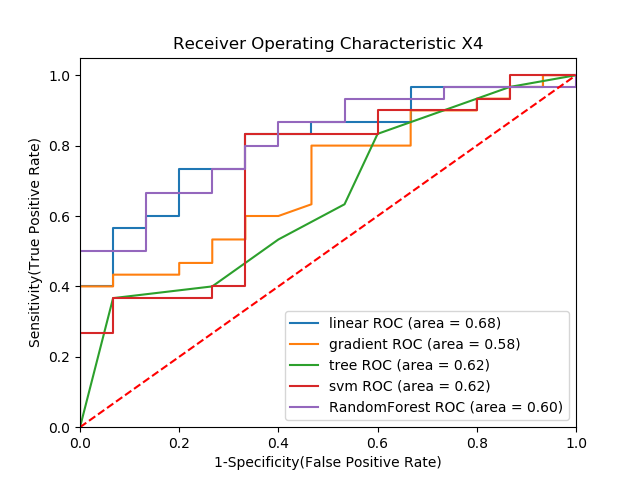

In [16]:
%matplotlib notebook
fig, ax = plt.subplots()
for m in Bestmodels_X4:
    model =Bestmodels_X4[m]['bestModel'] # select the model
#     y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X4_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X4_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic X4')
plt.legend(loc="lower right")
plt.show()   # Display
plt.savefig('Bestmodels_X4.png', facecolor=fig.get_facecolor(), bbox_inches='tight')